# Model Training
## 1.1 Import Data and Packages

In [9]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
# Remove the duplicate import of mean_squared_error and r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [11]:
df = pd.read_csv('data/Stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Prepare X and Y 

In [12]:
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
# Define a list of columns to check unique categories
columns_to_check = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

# Loop through the columns and print unique categories
for column in columns_to_check:
    print(f"Categories in '{column}' variable: {df[column].unique()}")


Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [14]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [15]:
# Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical features
numeric_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [16]:
X_train = preprocessor.fit_transform(X)
X_train.shape
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)
# Check the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800, 19)
X_test shape: (200, 19)


##### Create Eval Metrics Function

In [18]:
def evaluate_model(true, predicted):
    """
    Evaluate the performance of a regression model.

    Parameters:
    true (array-like): True target values.
    predicted (array-like): Predicted target values.

    Returns:
    dict: A dictionary containing MAE, RMSE, and R2 score.
    """
    metrics = {
        "MAE": mean_absolute_error(true, predicted),
        "MSE": mean_squared_error(true, predicted),
        "RMSE": np.sqrt(mean_squared_error(true, predicted)),
        "R2_Score": r2_score(true, predicted)
    }
    return metrics

In [20]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Initialize lists to store results
model_list = []
r2_list = []

# Iterate through models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_metrics = evaluate_model(y_train, y_train_pred)
    test_metrics = evaluate_model(y_test, y_test_pred)

    # Append results
    model_list.append(model_name)
    r2_list.append(test_metrics["R2_Score"])
    
    # Print results
    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_metrics["RMSE"]))
    print("- Mean Absolute Error: {:.4f}".format(train_metrics["MAE"]))
    print("- R2 Score: {:.4f}".format(train_metrics["R2_Score"]))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_metrics["RMSE"]))
    print("- Mean Absolute Error: {:.4f}".format(test_metrics["MAE"]))
    print("- R2 Score: {:.4f}".format(test_metrics["R2_Score"]))
    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7128
- Mean Absolute Error: 4.5168
- R2 Score: 0.8552
-----------------------

Results

In [21]:
# Create a DataFrame to display model performance
model_performance_df = pd.DataFrame({
    'Model Name': model_list,
    'R2_Score': r2_list
}).sort_values(by="R2_Score", ascending=False)

# Display the DataFrame
model_performance_df

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852258
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.851180
1,Lasso,0.825320
6,XGBRegressor,0.821221
3,K-Neighbors Regressor,0.783770
4,Decision Tree,0.749279


In [22]:
# Initialize and train the Linear Regression model
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)

# Calculate the R2 score
score = r2_score(y_test, y_pred) * 100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 88.04%


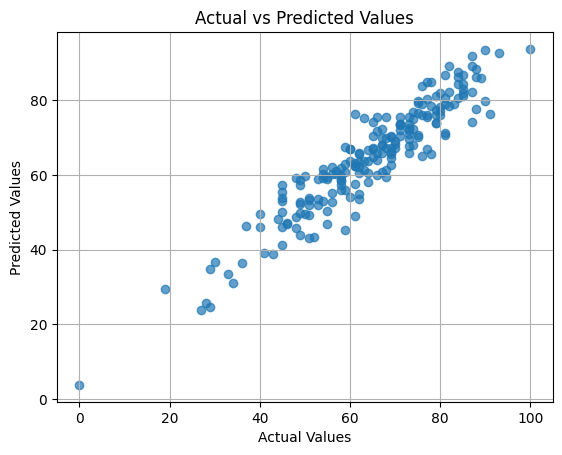

In [23]:
# Scatter plot to visualize the relationship between actual and predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

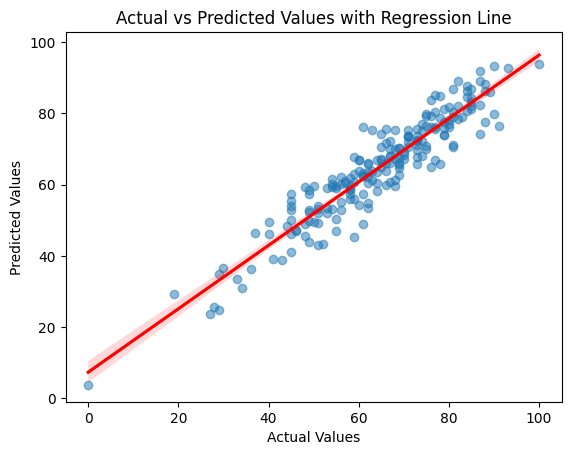

In [24]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')
plt.show()

In [25]:
# Create a DataFrame to compare actual and predicted values
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display the DataFrame
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
